# Load Dataset

In [8]:
%pip install pandas

import pandas as pd

train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)
df.head()


Note: you may need to restart the kernel to use updated packages.


,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [9]:
def display_all(df):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(df)

display_all(df.describe(include='all').T)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,1309.0,NaN,NaN,NaN,0.883881,1.583639,0.0,0.0,0.0,1.0,10.0
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre-Processing

We need to convert all categorical variables into numeric format. The categorical variables we will be keeping are Embarked, Sex and Title.

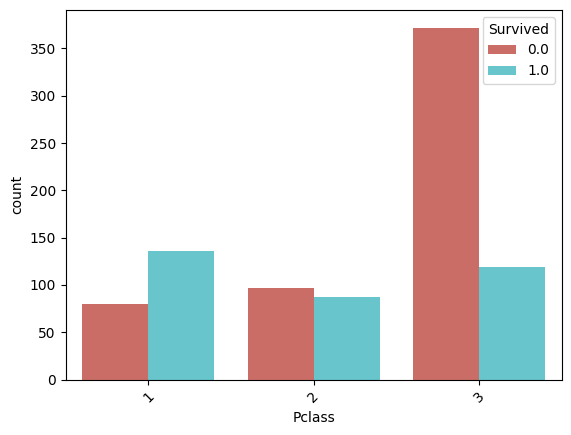

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()


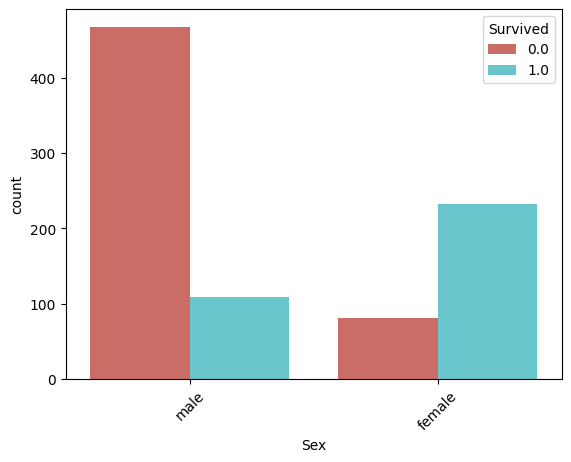

In [11]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

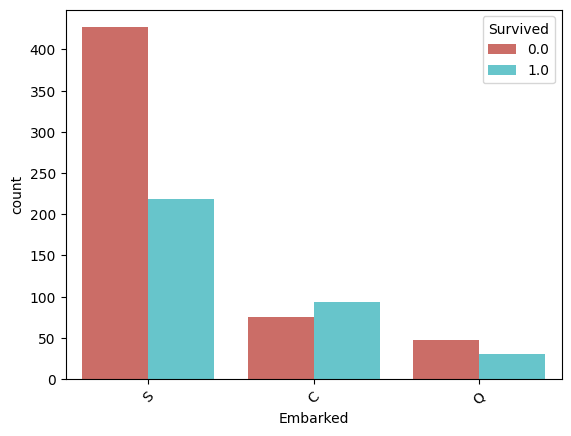

In [12]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [13]:
# convert category dtype to numerical
df['Sex'] = df['Sex'].astype('category').cat.codes

categorical = ['Embarked', 'Title']

for var in categorical:
    if var in df.columns:
        df = pd.concat([df, 
                        pd.get_dummies(df[var], prefix=var)], axis=1)
        del df[var]

In [14]:
# drop variables that are not needed
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_columns = [col for col in columns_to_drop if col in df.columns]
if existing_columns:
    df.drop(existing_columns, axis=1, inplace=True)

In [15]:
df.head()

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,False,False,True,False,False,False,True,False,False
1,38.0,1,71.2833,0,1,0,1,1.0,True,False,False,False,False,False,False,True,False
2,26.0,0,7.9250,0,3,0,0,1.0,False,False,True,False,False,True,False,False,False
3,35.0,1,53.1000,0,1,0,1,1.0,False,False,True,False,False,False,False,True,False
4,35.0,0,8.0500,0,3,1,0,0.0,False,False,True,False,False,False,True,False,False


In [16]:
from sklearn.preprocessing import StandardScaler

continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']
scaler = StandardScaler()
for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[[var]].values.reshape(-1, 1))


In [17]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,0.0,1.000382,-2.233408,-0.574635,0.033252,0.451175,3.832549
Family_Size,1309.0,NaN,NaN,NaN,0.0,1.000382,-0.558346,-0.558346,-0.558346,0.073352,5.758637
Fare,1309.0,NaN,NaN,NaN,0.0,1.000382,-0.643344,-0.490691,-0.363894,-0.03869,9.261749
Parch,1309.0,NaN,NaN,NaN,0.0,1.000382,-0.445,-0.445,-0.445,-0.445,9.956864
Pclass,1309.0,NaN,NaN,NaN,-0.0,1.000382,-1.546098,-0.352091,0.841916,0.841916,0.841916
Sex,1309.0,NaN,NaN,NaN,0.644003,0.478997,0.0,0.0,1.0,1.0,1.0
SibSp,1309.0,NaN,NaN,NaN,-0.0,1.000382,-0.479087,-0.479087,-0.479087,0.481288,7.203909
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Embarked_C,1309,2,False,1038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked_Q,1309,2,False,1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# missing values
missing = df.isnull().sum()
print("Missing values in each column:",missing)


Missing values in each column: Age               0
Family_Size       0
Fare              0
Parch             0
Pclass            0
Sex               0
SibSp             0
Survived        418
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Title_Dr          0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Rev         0
dtype: int64


# Split into train/test Model

In [19]:
# train/test split
from sklearn.model_selection import train_test_split
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

# Neural Network


In [ ]:
# create neural network model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_neural_network(input_dim=17, hidden_nodes=8, dropout_rate=0.3, learning_rate=0.001):

    
    model = Sequential([
       
        Dense(hidden_nodes, activation='relu', input_shape=(input_dim,), name='hidden_layer'),
        
        # Optional dropout for regularization
        Dropout(dropout_rate, name='dropout_layer'),
        
        # Output layer with sigmoid activation (binary classification)
        Dense(1, activation='sigmoid', name='output_layer')
    ])
    
   
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Get the number of features from training data
input_features = X_train.shape[1]
print(f"Number of input features: {input_features}")

# Create the model with default parameters
model = create_neural_network(input_dim=input_features, hidden_nodes=8)

# Display model architecture
model.summary()





Number of input features: 16


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer (Dropout)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# train model on full train set, with 80/20 CV split
import numpy as np

# Ensure all features are float32 for Keras
X_train_float = X_train.astype('float32')

training = model.fit(X_train_float, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_acc*100))


val_accuracy: 86.33%


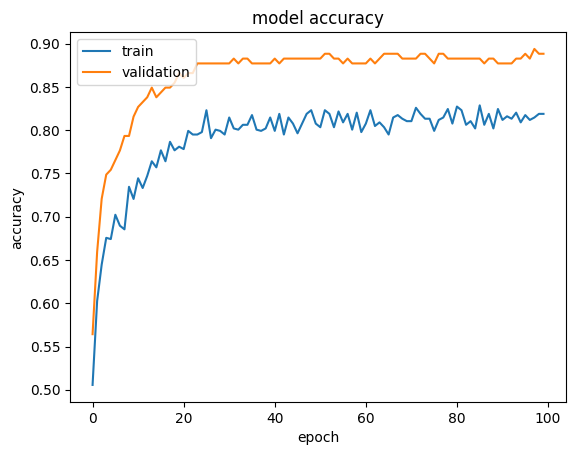

In [25]:
# Visualize results
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Use Grid Search

In [31]:

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(model=create_neural_network, input_dim=input_features, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2) 

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=16, epochs=50; total time=  22.9s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=16, epochs=50; total time=  22.8s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=16, epochs=50; total time=  23.2s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=16, epochs=100; total time=  45.3s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=16, epochs=100; total time=  42.2s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=16, epochs=100; total time=  29.7s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=32, epochs=50; total time=  12.0s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=32, epochs=50; total time=  10.6s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=32, epochs=50; total time=  11.3s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=32, epochs=100; total time=  31.4s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=32, epochs=100; total time=  29.0s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=32, epochs=100; total time=  20.6s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=64, epochs=50; total time=  11.4s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=64, epochs=50; total time=  11.7s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ...........................batch_size=64, epochs=50; total time=  16.7s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=64, epochs=100; total time=  30.2s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=64, epochs=100; total time=  25.5s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END ..........................batch_size=64, epochs=100; total time=  20.3s


c:\Users\Zohaib\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# evaluate the best model
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

Best: 0.830527 using {'batch_size': 16, 'epochs': 100}
0.826038 (0.011446) with: {'batch_size': 16, 'epochs': 50}
0.830527 (0.012992) with: {'batch_size': 16, 'epochs': 100}
0.828283 (0.014547) with: {'batch_size': 32, 'epochs': 50}
0.829405 (0.013561) with: {'batch_size': 32, 'epochs': 100}
0.806958 (0.010408) with: {'batch_size': 64, 'epochs': 50}
0.823793 (0.015141) with: {'batch_size': 64, 'epochs': 100}


In [40]:
# make predictions on test set using the best estimator from grid search
test['Survived'] = grid_result.best_estimator_.predict(X_test)
test['Survived'] = test['Survived'].apply(lambda x: round(x,0)).astype('int')
solution = test[['PassengerId', 'Survived']]
solution.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
